### Spectral graph theory
* [Class notes of course by David Spielman](http://www.cs.yale.edu/homes/spielman/561/2012/)

One interesting way to understand the structure of graphs is to think of the graph as if it was made out of some heat-conducting material such as metal, that the nodes were small balls and the edges wires connecting the balls.

Suppose the balls start at different termperatures. The temperature of each ball changes according to the difference between the temperature of the ball and the temperatures of neighboring balls.

Ultimately all of the balls reach equal temperature...

To be continued..

In [1]:
from numpy.linalg import eigh
from numpy import matrix
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [92]:
%%writefile line.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];
16 [style=filled];
17 [style=filled];
18 [style=filled];
19 [style=filled];
20 [style=filled];
21 [style=filled];
22 [style=filled];
23 [style=filled];
0--1--2--3--4--5--6--7--8--9--10--11--12--13--14--15--16--17--18--19--20--21--22--23;
}

Overwriting line.dot


In [35]:
%%writefile star.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1;
0--2;
0--3;
0--4;
0--5;
0--6;
0--7;
}

Writing star.dot


In [51]:
%%writefile circle.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1--2--3--4--5--6--7--0;
}

Overwriting circle.dot


In [52]:
%%writefile twoblobs.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
0--1; 0--2; 0--3;
1--2;1--3;
2--3;
3--4;
4--5;4--6;4--7;
5--6;5--7;
6--7;
}

Overwriting twoblobs.dot


In [53]:
%%writefile twoD.dot
graph G {
0 [style=filled];
1 [style=filled];
2 [style=filled];
3 [style=filled];
4 [style=filled];
5 [style=filled];
6 [style=filled];
7 [style=filled];
8 [style=filled];
9 [style=filled];
10 [style=filled];
11 [style=filled];
12 [style=filled];
13 [style=filled];
14 [style=filled];
15 [style=filled];


0--1--2--3;
4--5--6--7;
8--9--10--11;
12--13--14--15;
0--4--8--12;
1--5--9--13;
2--6--10--14;
3--7--11--15;
}

Overwriting twoD.dot


In [93]:
import pydot
filename='line'
dot=open(filename+'.dot','r').readlines()
dot=''.join(dot)

A=pydot.dot_parser.parse_dot_data(dot)
A.write_gif(filename+'.gif')
gif_name=filename+'.gif'
!open $gif_name

In [94]:
node_n=len(A.get_nodes())
M=matrix(np.zeros([node_n,node_n]))

for edge in A.get_edge_list():
    _i=int(edge.get_source())
    _j=int(edge.get_destination())
    M[_i,_j]=-1
    M[_j,_i]=-1
C=copy(-M)
for i in range(node_n):
    M[i,i]=-sum(M[i,:])
print M

w,v=eigh(M)
print 'eigenvalues=',w

_range=[0.,100.]
_offset=_range[0]
_scale=_range[1]-_range[0]
_min=-1.;_max=1.;
def vec2color(v):
    return['grey'+str(int(_offset+_scale*(x-_min)/(_max-_min))) for x in v]

!rm $filename*.gif
for j in range(min(10,node_n)):
    colors=vec2color(v[:,j])
    #print colors
    i=0
    for node in A.get_node_list():
        node.set_color(colors[i])
        i+=1
    A.write_gif("%s.%d.gif"%(filename,j))
!open $filename*.gif

[[ 1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  2. -1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.

In [95]:
def print_eig(w,v):
    for i in range(node_n):
        print str(i),'eigval:%5.2f'%w[i],
        print 'eigvec:',', '.join(['%5.1f'%x for x in v[:,i]])
print_eig(w,v)

0 eigval:-0.00 eigvec:   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2,   0.2
1 eigval: 0.02 eigvec:  -0.3,  -0.3,  -0.3,  -0.3,  -0.2,  -0.2,  -0.2,  -0.2,  -0.1,  -0.1,  -0.1,  -0.0,   0.0,   0.1,   0.1,   0.1,   0.2,   0.2,   0.2,   0.2,   0.3,   0.3,   0.3,   0.3
2 eigval: 0.07 eigvec:   0.3,   0.3,   0.2,   0.2,   0.1,   0.0,  -0.0,  -0.1,  -0.2,  -0.2,  -0.3,  -0.3,  -0.3,  -0.3,  -0.2,  -0.2,  -0.1,  -0.0,   0.0,   0.1,   0.2,   0.2,   0.3,   0.3
3 eigval: 0.15 eigvec:   0.3,   0.2,   0.2,   0.1,  -0.1,  -0.2,  -0.2,  -0.3,  -0.3,  -0.2,  -0.2,  -0.1,   0.1,   0.2,   0.2,   0.3,   0.3,   0.2,   0.2,   0.1,  -0.1,  -0.2,  -0.2,  -0.3
4 eigval: 0.27 eigvec:   0.3,   0.2,   0.1,  -0.1,  -0.2,  -0.3,  -0.3,  -0.2,  -0.1,   0.1,   0.2,   0.3,   0.3,   0.2,   0.1,  -0.1,  -0.2,  -0.3,  -0.3,  -0.2,  -0.1,   0.1,   0.2,   0.3
5 eigval: 0.41 eigvec:   0.3,   0.2,  -0.0,  -0.2,

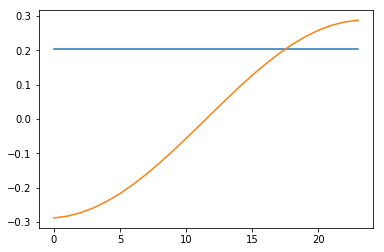

In [99]:
plot(v[:,:2]);

### an initial attempt to relate the Laplacian to random walk

In [86]:
p=0.1
for i in range(node_n):
    C[i,:] = C[i,:]/sum(C[i,:])
T=(1-p)*eye(node_n)+p*C

T

array([[ 0.9       ,  0.01428571,  0.01428571,  0.01428571,  0.01428571,
         0.01428571,  0.01428571,  0.01428571],
       [ 0.1       ,  0.9       ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  0.9       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.9       ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.        ,  0.9       ,
         0.        ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.9       ,  0.        ,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.9       ,  0.        ],
       [ 0.1       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.9       ]])

In [91]:
ww,vv=eig(T)

print_eig(ww,vv)

0 eigval: 1.00 eigvec:   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4,   0.4
1 eigval: 0.80 eigvec:   0.4,  -0.4,  -0.4,  -0.4,  -0.4,  -0.4,  -0.4,  -0.4
2 eigval: 0.90 eigvec:  -0.0,   0.5,   0.7,  -0.2,  -0.2,  -0.2,  -0.2,  -0.2
3 eigval: 0.90 eigvec:  -0.0,   0.8,  -0.6,  -0.0,  -0.0,  -0.0,  -0.0,  -0.0
4 eigval: 0.90 eigvec:   0.0,  -0.3,  -0.1,   0.3,   0.8,  -0.2,  -0.2,  -0.2
5 eigval: 0.90 eigvec:   0.0,  -0.5,  -0.2,   0.8,  -0.2,   0.0,   0.0,   0.0
6 eigval: 0.90 eigvec:   0.0,  -0.3,  -0.1,   0.2,  -0.3,  -0.4,   0.8,  -0.0
7 eigval: 0.90 eigvec:   0.0,  -0.0,  -0.0,   0.2,  -0.4,  -0.4,  -0.1,   0.8


In [82]:
vv

array([[ -7.07106781e-01,   0.00000000e+00,   0.00000000e+00,
          1.09090621e-15,   2.75708994e-15,   0.00000000e+00,
          4.19775323e-15,  -7.07106781e-01],
       [  2.67261242e-01,  -7.64923943e-17,  -1.91230986e-17,
         -1.96520192e-01,  -4.96673170e-01,   0.00000000e+00,
         -7.56199996e-01,  -2.67261242e-01],
       [  2.67261242e-01,  -3.24668129e-02,   2.57635484e-02,
         -3.50450435e-01,  -5.57883107e-01,  -5.94420769e-02,
          6.46407437e-01,  -2.67261242e-01],
       [  2.67261242e-01,  -8.31144913e-02,  -3.59738563e-02,
          7.18818096e-01,  -7.33534378e-02,  -5.69501260e-01,
          5.02876978e-02,  -2.67261242e-01],
       [  2.67261242e-01,   3.07752151e-01,  -4.69065388e-01,
         -4.17997204e-01,   4.89425693e-01,  -3.57180847e-01,
         -2.39124260e-02,  -2.67261242e-01],
       [  2.67261242e-01,  -8.29127966e-01,  -4.91143962e-02,
         -6.34071978e-02,   3.13886311e-01,   2.54424389e-01,
         -7.68277303e-04,  -2.6